In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
print("---", tf.__version__)

--- 1.15.0


In [3]:
sdata = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magnetichall103update.csv")
sdata1 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magnetickitchen206updateV2.csv")
sdata2 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magneticroom304update.csv")

sdata.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']
sdata1.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']
sdata2.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']

In [4]:
# Check the shape of the data

print(sdata.shape,
sdata1.shape,
sdata2.shape)


#Exploratory Data Analysis

df = pd.concat([sdata, sdata1, sdata2], axis=0)

df = df.reset_index(drop=True)

df.head(1000)

(1332, 6) (1558, 6) (1610, 6)


,TimeStamp,X,Y,Z,Magnitude,CoordinateID
0,2020-08-19 07:53:37:962,21.240000,-33.360000,-16.560000,25.664200,1
1,2020-08-19 07:53:37:982,21.300000,-33.540000,-16.500000,25.668268,1
2,2020-08-19 07:53:38:002,20.699999,-33.780000,-16.500000,25.163067,1
3,2020-08-19 07:53:38:022,20.939999,-33.660000,-16.320000,25.248880,1
4,2020-08-19 07:53:38:041,20.880000,-33.239998,-16.500000,25.332674,1
...,...,...,...,...,...,...
995,2020-08-19 07:54:39:599,20.939999,-35.579998,-13.259999,23.305603,1
996,2020-08-19 07:54:39:619,21.060000,-36.059998,-13.139999,23.325162,1
997,2020-08-19 07:54:39:640,20.820000,-35.820000,-13.559999,23.360351,1
998,2020-08-19 07:54:39:659,21.000000,-35.520000,-13.679999,23.603016,1


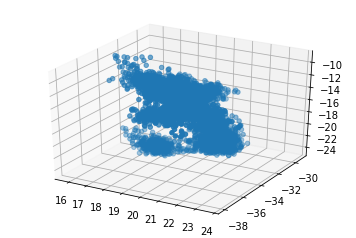

In [5]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
x, y, z = df['X'], df['Y'], df['Z']

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x,y,z,)
plt.show()

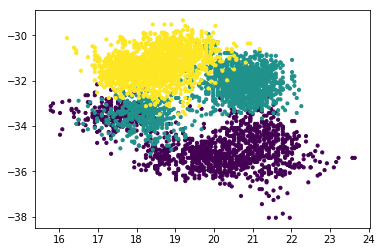

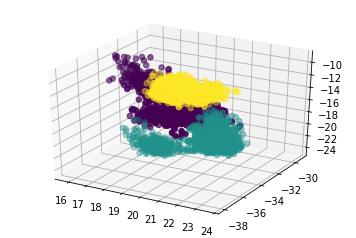

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create Map
cm = plt.get_cmap("RdYlGn")

x, y, z = df['X'], df['Y'], df['Z']
col = df['CoordinateID']

# 2D Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, s=10, c=col, marker='o')  

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(x, y, z, s=30, c=col, marker='o')                                                                                

plt.show()

3    1610
2    1558
1    1332
Name: CoordinateID, dtype: int64


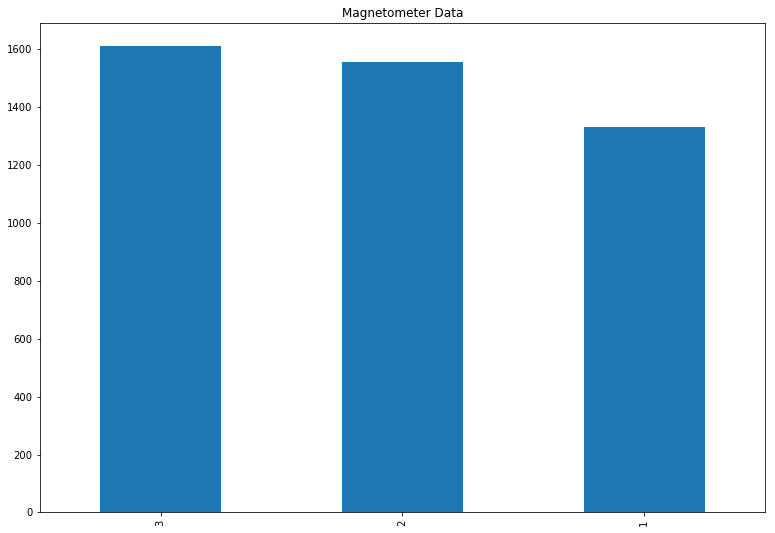

In [7]:
InsData = df['CoordinateID'].value_counts()
print(InsData)
InsData.plot(kind = 'bar', title = 'Magnetometer Data', figsize = (13, 9))

In [8]:
def plot_activity(activity, df):
    rowActivity = (df['CoordinateID'] == activity)
    data = df[rowActivity]
    data = data[['X','Y','Z']]
    data = data[:2000]
    axis = data.plot(subplots=True, figsize=(16,12), title=activity)

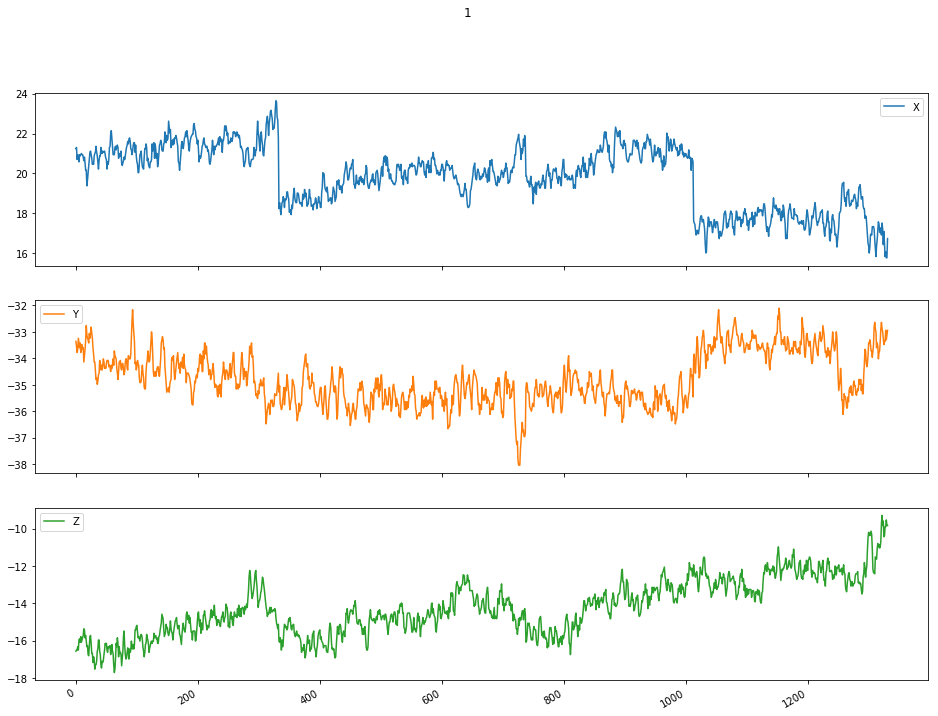

In [9]:
plot_activity(1, df)

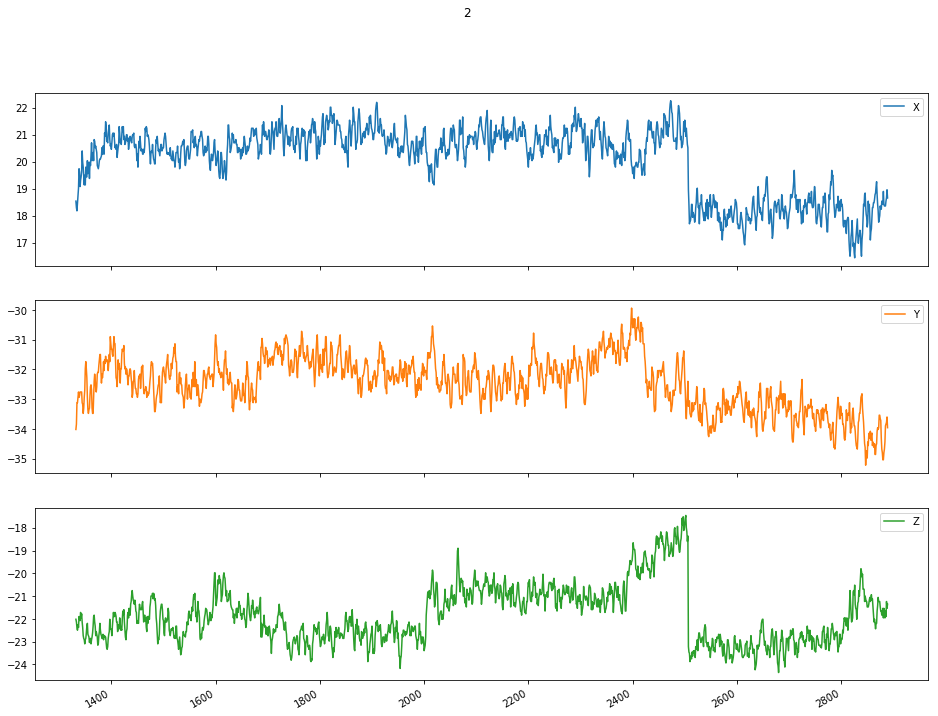

In [10]:
plot_activity(2, df)

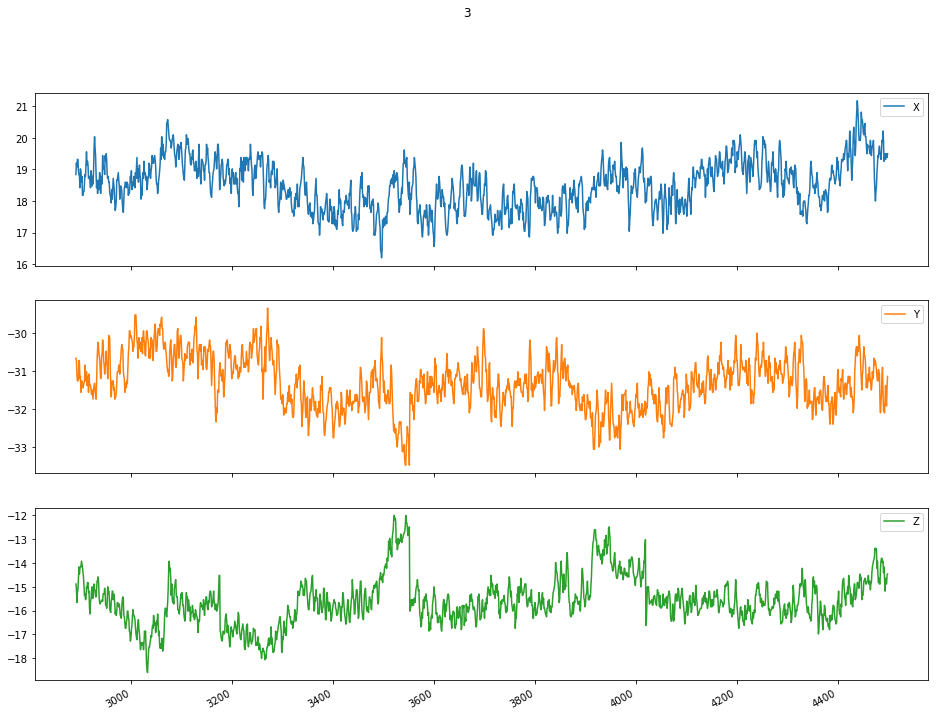

In [11]:
plot_activity(3, df)

In [12]:
df = df.drop(['TimeStamp'], axis = 1) 

In [13]:
df_train, df_test = train_test_split(df, test_size = 0.1, shuffle = True) # Shuffle is set True because the data in in ordered format
print(df_train.shape)
df_train.head(4000)

(4050, 5)


,X,Y,Z,Magnitude,CoordinateID
2013,19.680000,-31.380000,-20.939999,27.622924,2
3201,18.779999,-31.080000,-17.100000,24.144116,3
4030,18.779999,-31.199999,-15.660000,23.141390,3
893,21.539999,-35.700000,-12.960000,23.675581,1
1348,19.140000,-32.940000,-22.920000,28.736493,2
...,...,...,...,...,...
219,20.520000,-34.440000,-14.940000,23.987371,1
3915,18.359999,-32.700000,-13.139999,21.079590,3
477,20.279999,-35.760000,-16.500000,24.738803,1
3204,18.660000,-30.720000,-16.680000,23.769266,3


In [14]:
df_test.tail(50)

,X,Y,Z,Magnitude,CoordinateID
3509,17.940000,-31.500000,-13.740000,21.157297,3
2111,21.180000,-32.880000,-21.119999,28.790393,2
225,21.300000,-34.200000,-14.400000,24.344403,1
3422,17.640000,-32.100000,-15.960000,22.398464,3
3633,18.000000,-31.019999,-16.199999,22.899781,3
3359,17.640000,-31.439999,-14.519999,21.427085,3
3975,18.420000,-32.040000,-14.700000,22.165433,3
3726,17.699999,-31.439999,-15.360000,22.053107,3
1048,17.400000,-33.600000,-13.200000,20.243517,1
3149,19.800000,-30.960000,-15.420000,23.830576,3


In [15]:
scale_columns = ['X', 'Y', 'Z', 'Magnitude']
scaler = RobustScaler()
scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(
   df_train[scale_columns].to_numpy()
)

df_test.loc[:, scale_columns] = scaler.transform(
    df_test[scale_columns].to_numpy()
)

C:\Users\Anuj\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Anuj\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
def create_dataset(X, y, time_steps = 1, step = 1):
    Xs, ys = [], []
    for index in range(0, len(X) - time_steps, step):
        v = X.iloc[index:(index + time_steps)].values
        labels = y.iloc[index:index + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [17]:
TIME_STEPS = 24
STEP = 1
X_train, y_train = create_dataset(
    df_train[['X', 'Y', 'Z', 'Magnitude']],
    df_train.CoordinateID,
    TIME_STEPS,
    STEP
)
X_test, y_test = create_dataset(
    df_test[['X', 'Y', 'Z', 'Magnitude']],
    df_test.CoordinateID,
    TIME_STEPS,
    STEP
)
print(X_train.shape, y_train.shape)

(4026, 24, 4) (4026, 1)


In [18]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder = encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
y_test.shape

(426, 3)

In [19]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4026, 24, 4) (4026, 3) (426, 24, 4) (426, 3)


## Model

In [20]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
    keras.layers.LSTM(
    units = 128,
    input_shape = [X_train.shape[1], X_train.shape[2]]
    )
)
)
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation = 'softmax'))
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['acc']
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Training phase

In [21]:
history3 = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=100,
    validation_split = 0.1,
    shuffle=False
)


Train on 3623 samples, validate on 403 samples
Epoch 1/35
3623/3623 [==============================] - 8s 2ms/step - loss: 0.8677 - acc: 0.5598 - val_loss: 0.9697 - val_acc: 0.5211
Epoch 2/35
3623/3623 [==============================] - 4s 1ms/step - loss: 0.7009 - acc: 0.7094 - val_loss: 0.7136 - val_acc: 0.6973
Epoch 3/35
3623/3623 [==============================] - 4s 1ms/step - loss: 0.5705 - acc: 0.7566 - val_loss: 0.6519 - val_acc: 0.7097
Epoch 4/35
3623/3623 [==============================] - 4s 1ms/step - loss: 0.5488 - acc: 0.7590 - val_loss: 0.8144 - val_acc: 0.6650
Epoch 5/35
3623/3623 [==============================] - 4s 996us/step - loss: 0.5300 - acc: 0.7701 - val_loss: 0.8086 - val_acc: 0.6402
Epoch 6/35
3623/3623 [==============================] - 4s 1ms/step - loss: 0.5256 - acc: 0.7643 - val_loss: 0.7525 - val_acc: 0.6849
Epoch 7/35
3623/3623 [==============================] - 4s 1ms/step - loss: 0.5170 - acc: 0.7668 - val_loss: 0.7912 - val_acc: 0.6576
Epoch 8/35
3

In [22]:
model.evaluate(X_test, y_test)

426/426 [==============================] - 0s 561us/step


[0.5190488195195444, 0.7676056623458862]

In [23]:
history4 = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=100,
    validation_split = 0.1,
    shuffle=True
)

Train on 3623 samples, validate on 403 samples
Epoch 1/20
3623/3623 [==============================] - 4s 1ms/step - loss: 0.3540 - acc: 0.8438 - val_loss: 0.4431 - val_acc: 0.8561
Epoch 2/20
3623/3623 [==============================] - 4s 1ms/step - loss: 0.3184 - acc: 0.8631 - val_loss: 0.4559 - val_acc: 0.8486
Epoch 3/20
3623/3623 [==============================] - 3s 940us/step - loss: 0.3091 - acc: 0.8659 - val_loss: 0.5296 - val_acc: 0.8610
Epoch 4/20
3623/3623 [==============================] - 3s 917us/step - loss: 0.3013 - acc: 0.8683 - val_loss: 0.5265 - val_acc: 0.85610.3006 - acc: 0.8
Epoch 5/20
3623/3623 [==============================] - 3s 938us/step - loss: 0.2949 - acc: 0.8725 - val_loss: 0.4717 - val_acc: 0.8511
Epoch 6/20
3623/3623 [==============================] - 3s 945us/step - loss: 0.2746 - acc: 0.8874 - val_loss: 0.5328 - val_acc: 0.8635
Epoch 7/20
3623/3623 [==============================] - 4s 1ms/step - loss: 0.2904 - acc: 0.8772 - val_loss: 0.4411 - val_ac

In [24]:
history5 = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=100,
    validation_split = 0.1,
    shuffle=False
)

Train on 3623 samples, validate on 403 samples
Epoch 1/10
3623/3623 [==============================] - 3s 903us/step - loss: 0.2576 - acc: 0.8929 - val_loss: 0.5710 - val_acc: 0.7916
Epoch 2/10
3623/3623 [==============================] - 3s 921us/step - loss: 0.2771 - acc: 0.8802 - val_loss: 0.6248 - val_acc: 0.8263
Epoch 3/10
3623/3623 [==============================] - 3s 883us/step - loss: 0.2308 - acc: 0.9037 - val_loss: 0.5003 - val_acc: 0.8263
Epoch 4/10
3623/3623 [==============================] - 4s 974us/step - loss: 0.2104 - acc: 0.9120 - val_loss: 0.5825 - val_acc: 0.8536
Epoch 5/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.2465 - acc: 0.9006 - val_loss: 0.6954 - val_acc: 0.8065
Epoch 6/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.2232 - acc: 0.9092 - val_loss: 0.6902 - val_acc: 0.8437
Epoch 7/10
3623/3623 [==============================] - 3s 954us/step - loss: 0.1636 - acc: 0.9313 - val_loss: 0.7927 - val_acc: 0.8387
Epoch

In [25]:
model.evaluate(X_test, y_test)

426/426 [==============================] - 0s 469us/step


[0.6874718771014415, 0.7558685541152954]

In [26]:
history5 = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=10,
    validation_split = 0.1,
    shuffle=False
)

Train on 3623 samples, validate on 403 samples
Epoch 1/20
3623/3623 [==============================] - 12s 3ms/step - loss: 0.7121 - acc: 0.7223 - val_loss: 0.4307 - val_acc: 0.8164
Epoch 2/20
3623/3623 [==============================] - 12s 3ms/step - loss: 0.4442 - acc: 0.8076 - val_loss: 0.6256 - val_acc: 0.7643
Epoch 3/20
3623/3623 [==============================] - 11s 3ms/step - loss: 0.4106 - acc: 0.8231 - val_loss: 0.5181 - val_acc: 0.7767
Epoch 4/20
3623/3623 [==============================] - 13s 4ms/step - loss: 0.3694 - acc: 0.8482 - val_loss: 0.6823 - val_acc: 0.7494
Epoch 5/20
3623/3623 [==============================] - 14s 4ms/step - loss: 0.3425 - acc: 0.8498 - val_loss: 0.7620 - val_acc: 0.7047
Epoch 6/20
3623/3623 [==============================] - 16s 4ms/step - loss: 0.2852 - acc: 0.8777 - val_loss: 0.5650 - val_acc: 0.8015
Epoch 7/20
3623/3623 [==============================] - 14s 4ms/step - loss: 0.2863 - acc: 0.8780 - val_loss: 0.6281 - val_acc: 0.7841ss: 0.296

In [27]:
model.evaluate(X_test, y_test)

426/426 [==============================] - 0s 446us/step


[1.226598169881973, 0.7535211443901062]

In [24]:
X_test

array([[[-0.38461538, -0.31707249,  0.45714293],
        [-0.28205128,  0.58536609, -0.02857143],
        [-0.66666667,  0.17073218, -0.03809509],
        ...,
        [-0.64102564, -0.56097584,  0.51428595],
        [-0.76923077, -0.70731736,  0.79047632],
        [-0.66666667,  0.51219574, -0.03809509]],

       [[-0.28205128,  0.58536609, -0.02857143],
        [-0.66666667,  0.17073218, -0.03809509],
        [-0.43589786,  0.2682932 ,  0.        ],
        ...,
        [-0.76923077, -0.70731736,  0.79047632],
        [-0.66666667,  0.51219574, -0.03809509],
        [ 0.07692308,  0.80487838, -0.4285715 ]],

       [[-0.66666667,  0.17073218, -0.03809509],
        [-0.43589786,  0.2682932 ,  0.        ],
        [ 0.79487179, -0.17073178, -0.62857153],
        ...,
        [-0.66666667,  0.51219574, -0.03809509],
        [ 0.07692308,  0.80487838, -0.4285715 ],
        [ 1.41025641, -1.5853665 ,  0.24761909]],

       ...,

       [[-0.0769235 , -0.34146355,  0.49523817],
        [-0

In [28]:
y_pred = model.predict(X_test)
y_test.shape

(426, 3)

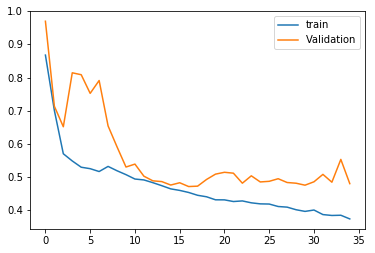

In [29]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'],label='train')
plt.plot(history3.history['val_loss'],label='Validation')
plt.legend()

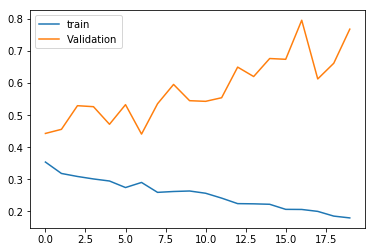

In [30]:
import matplotlib.pyplot as plt
plt.plot(history4.history['loss'],label='train')
plt.plot(history4.history['val_loss'],label='Validation')
plt.legend()

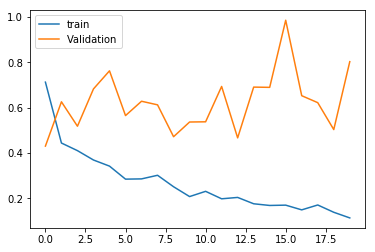

In [31]:
import matplotlib.pyplot as plt
plt.plot(history5.history['loss'],label='train')
plt.plot(history5.history['val_loss'],label='Validation')
plt.legend()

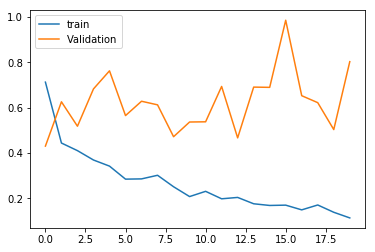

In [32]:
import matplotlib.pyplot as plt
plt.plot(history5.history['loss'],label='train')
plt.plot(history5.history['val_loss'],label='Validation')
plt.legend()

## Model Accuracy

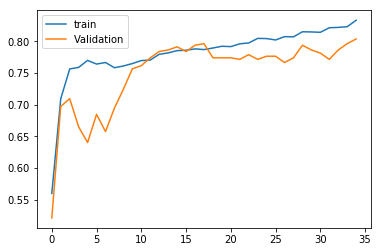

In [33]:
import matplotlib.pyplot as plt
plt.plot(history3.history['acc'],label='train')
plt.plot(history3.history['val_acc'],label='Validation')
plt.legend()

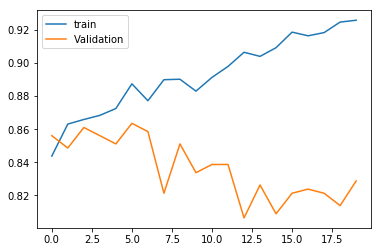

In [34]:
import matplotlib.pyplot as plt
plt.plot(history4.history['acc'],label='train')
plt.plot(history4.history['val_acc'],label='Validation')
plt.legend()

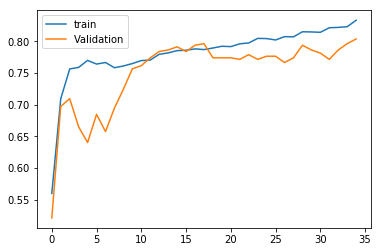

In [35]:
import matplotlib.pyplot as plt
plt.plot(history3.history['acc'],label='train')
plt.plot(history3.history['val_acc'],label='Validation')
plt.legend()

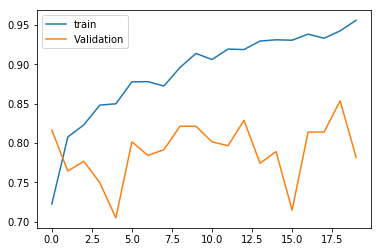

In [36]:
import matplotlib.pyplot as plt
plt.plot(history5.history['acc'],label='train')
plt.plot(history5.history['val_acc'],label='Validation')
plt.legend()

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               136192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 169,475
Trainable params: 169,475
Non-trainable params: 0
_________________________________________________________________


In [38]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(19, 8)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

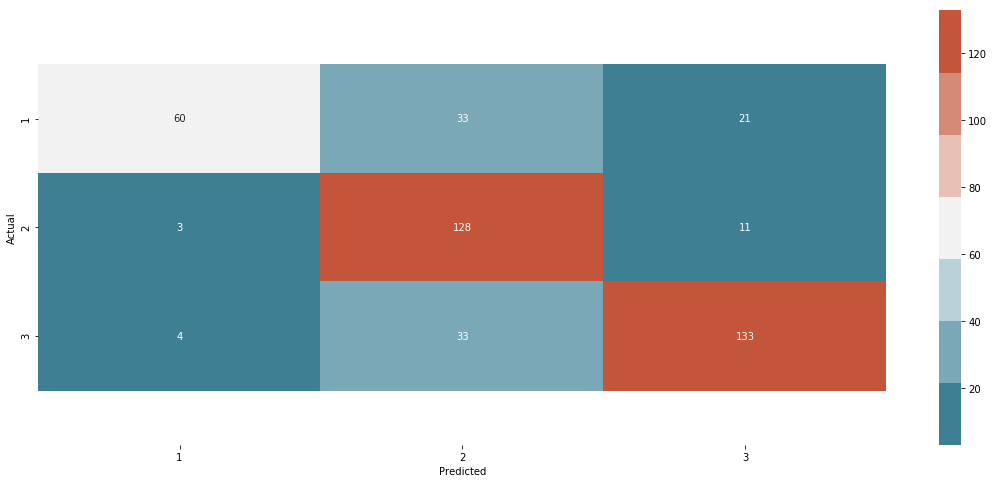

In [39]:
plot_cm(
  encoder.inverse_transform(y_test),
  encoder.inverse_transform(y_pred),
  encoder.categories_[0]
)

In [40]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("model.h5")